# Bike Sharing Assignment
## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands**
## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. .

In [124]:
# importing required packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Step 1: Reading and understanding the data

In [125]:
#importing dataset
bike_sharing=pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [126]:
bike_sharing.shape


(730, 16)

In [127]:
bike_sharing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [128]:
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no null values present in the data

Before visualising the data, convert into their respective data types if required. Some of the columns in the data set are categorical variables while others are in numerical ones. As provide to us we can divide them as follows: Numerical - temp, atemp, hum, windspeed, casual, registered, cnt Categorical - season, yr, mnth, holiday, weekday, workingday, weathersit while the remaining two columns are: day : date instant: record index which we are going to keep as it is.

In [129]:
bike_sharing.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

As we can check, all are in either int or float values, we have to change categorical columns into their respective data types.


In [130]:
categorical_variables=['season','yr','mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_sharing[categorical_variables]=bike_sharing[categorical_variables].astype("str")

In [131]:
bike_sharing.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2 : Visualising the data

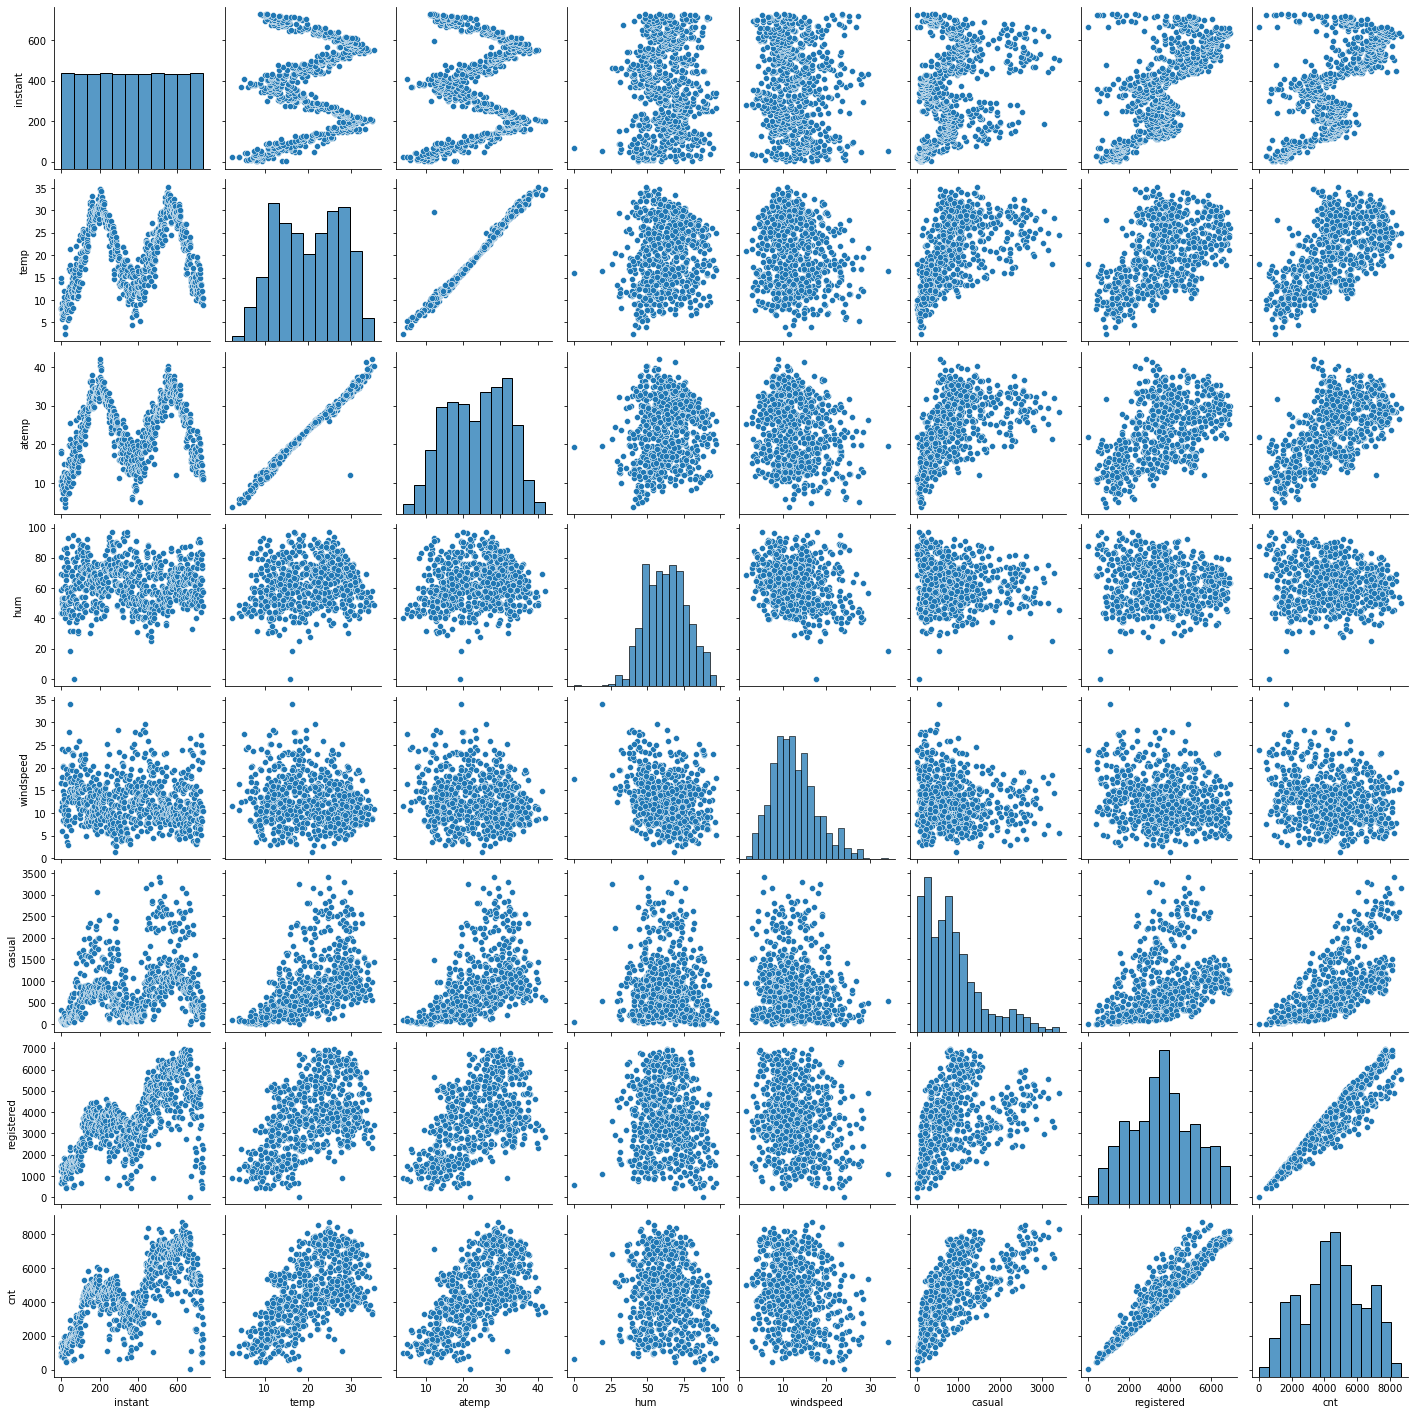

In [132]:
# Analysis the numerical data via pair plot
sns.pairplot(bike_sharing)
plt.show()

-temp and atemp are highly corelated with each other so can drop one of them.

-cnt is the sum of casual and registered. Hence both should be dropped.

-instant column is just like index column so can be dropped.

<AxesSubplot:>

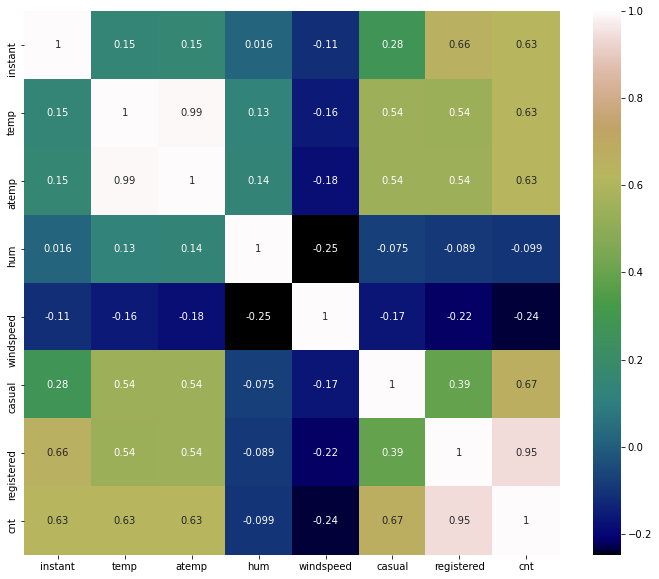

In [133]:
# Plot heatmap
corr = bike_sharing[['instant','temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='gist_earth')

*It is clear from above heat map, temp and atemp are highly correlated, which means one column can be drop*

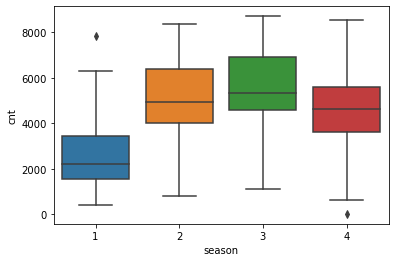

In [134]:
sns.boxplot(x='season',y='cnt',data=bike_sharing)
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

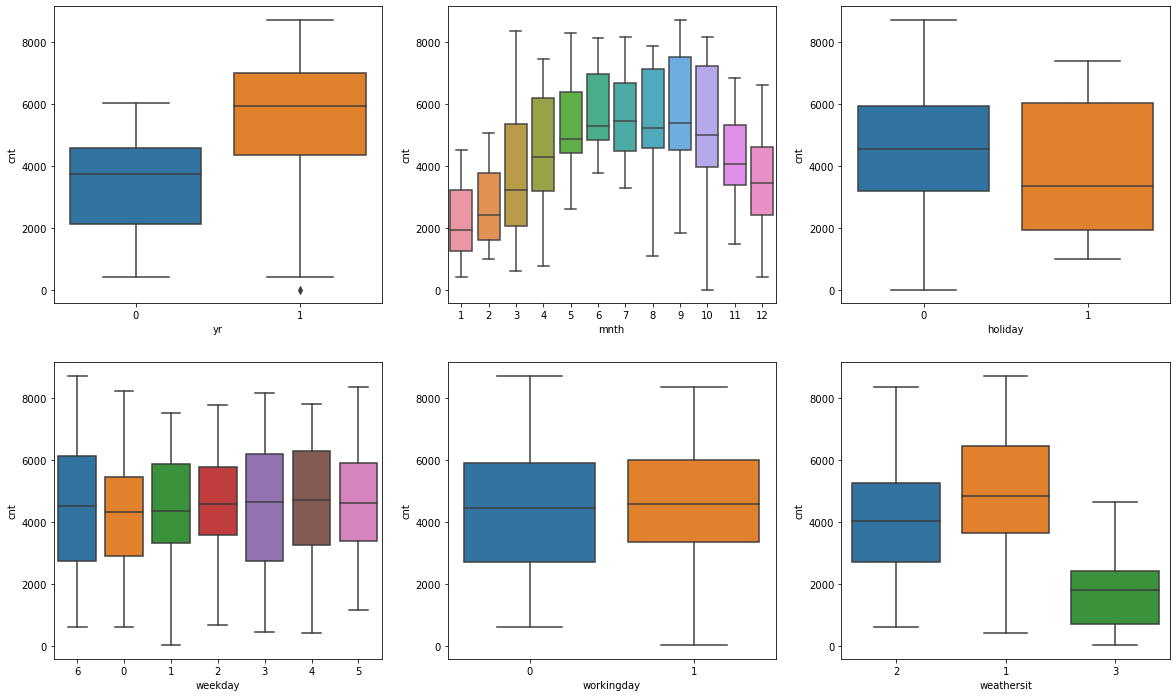

In [135]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt',data=bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing)

from the above plot we can conclude:

Holiday and workingday column have not much dependency on the cnt variable, which is the total count of rental bikes.
Also weekday column also show us the similar kind of dependency on the cnt varibale.

# Step 3: Data Preparation
There are many categorical variables in the data set, which needs to be converted into the appropiate data types, in order to fit a regression line. For all the above columns we can use dummy variables.

In [136]:
# categorical variables.
categorical_variables  

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [137]:
# Create Dummy variables

dummy=pd.get_dummies(bike_sharing[categorical_variables],drop_first=True) 
dummy.head()

,season_2,season_3,season_4,yr_1,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


season 

1:spring, 

2:summer, 

3:fall, 

4:winter 

yr : year 

0: 2018 

1:2019 

mnth : month 

1 to 12

holiday : 

weather day is a holiday or not 

weekday : day of the week 

workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 

weathersit : 

1: Clear, Few clouds, Partly cloudy, Partly cloudy 

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

_Changes Needed_

- Month into their proper names, like: 1 - Jan , 2 - Feb etc. 

- yr_1 - yr_2019

- season abbrevated as S 

- weathersit abbrevated as W 

- holiday_1 as holiday f. workingday_1 as workingday , etc.

In [138]:
#Python program to refactor
for i in dummy:
    if 'season' in i:
        dummy.rename(columns = {i:'S{}'.format(i.split('_')[-1])}, inplace = True)
    if 'weathersit' in i:
        dummy.rename(columns = {i:'W{}'.format(i.split('_')[-1])}, inplace = True)
    if 'holiday' in i:
        dummy.rename(columns = {i:'holiday'},inplace=True)
    if 'workingday' in i:
        dummy.rename(columns = {i:'workingday'}, inplace = True)
    if 'yr' in i:
        dummy.rename(columns = {i:'yr_2019'}, inplace = True)
    if 'mnth' in i:
        x=i.split('_')[-1]
        if x=='1':
            dummy.rename(columns = {i:'Jan'}, inplace = True)
        elif x=='2':
            dummy.rename(columns = {i:'Feb'}, inplace = True)
        elif x=='3':
            dummy.rename(columns = {i:'Mar'}, inplace = True)
        elif x=='4':
            dummy.rename(columns = {i:'Apr'}, inplace = True)
        elif x=='5':
            dummy.rename(columns = {i:'May'}, inplace = True)
        elif x=='6':
            dummy.rename(columns = {i:'Jun'}, inplace = True)
        elif x=='7':
            dummy.rename(columns = {i:'Jul'}, inplace = True)
        elif x=='8':
            dummy.rename(columns = {i:'Aug'}, inplace = True)
        elif x=='9':
            dummy.rename(columns = {i:'Sep'}, inplace = True)
        elif x=='10':
            dummy.rename(columns = {i:'Oct'}, inplace = True)
        elif x=='11':
            dummy.rename(columns = {i:'Nov'}, inplace = True)
        elif x=='12':
            dummy.rename(columns = {i:'Dec'}, inplace = True)

In [139]:
dummy.head()

,S2,S3,S4,yr_2019,Oct,Nov,Dec,Feb,Mar,Apr,...,holiday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday,W2,W3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [140]:
# Add both data frames
bike_sharing = pd.concat([bike_sharing, dummy], axis = 1)

In [141]:
bike_sharing.shape

(730, 41)

Dropping the columns

In [142]:
# Drop columns for which created the dummies
bike_sharing.drop(categorical_variables, axis = 1, inplace = True)

In [143]:
# drop instant variable which is record index and dteday as it is datetime , and also there is month,weekday similar to that
bike_sharing.drop(['instant','dteday'],axis=1,inplace=True)

In [144]:
# drop casual and registered columns as both are the sumed to cnt
bike_sharing.drop(['casual','registered'],axis=1,inplace=True)

In [145]:
# drop atemp column as it is highly correlated with the temp column
bike_sharing.drop(['atemp'],axis=1,inplace=True)

In [146]:
bike_sharing.head()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [147]:
bike_sharing.shape

(730, 27)


# Step 4: Splitting the data into Training & Test Data

In [154]:

#Split the data into train and test dataset

bike_sharing_train,bike_sharing_test=train_test_split(bike_sharing,train_size=0.7,test_size=0.3,random_state=100)

## Rescaling Training data

In [155]:
#Min-Max Scaling
scaler=MinMaxScaler()

num_vars=['temp','hum','windspeed','cnt']
bike_sharing_train[num_vars]=scaler.fit_transform(bike_sharing_train[num_vars])

In [156]:
#after min-max sclaing, numerical values present b/w 0 & 1 range
bike_sharing_train.head()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
576,0.815169,0.725633,0.264686,0.827658,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0.245101,0.498067,0.663106,0.204096,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [157]:
bike_sharing_train.describe()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.507843,0.086275,0.086275,...,0.096078,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.500429,0.281045,0.281045,...,0.294988,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [158]:
bike_sharing_y_train=bike_sharing_train.pop('cnt')
bike_sharing_X_train=bike_sharing_train

# Step 5: Building a model

### RFE (Recursive Feature Selection)

In [159]:
#Builind a regression model
lr=LinearRegression()
lr.fit(bike_sharing_X_train,bike_sharing_y_train)

LinearRegression()

In [160]:
# Running RFE with the output number of the variable equal to 15
rfe=RFE(lr,15)
rfe=rfe.fit(bike_sharing_X_train,bike_sharing_y_train)

In [161]:
list(zip(bike_sharing_X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('S2', True, 1),
 ('S3', True, 1),
 ('S4', True, 1),
 ('yr_2019', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 12),
 ('Dec', False, 11),
 ('Feb', False, 8),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', False, 2),
 ('Jul', False, 10),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('weekday_1', False, 9),
 ('weekday_2', False, 7),
 ('weekday_3', False, 5),
 ('weekday_4', False, 6),
 ('weekday_5', False, 4),
 ('weekday_6', False, 3),
 ('W2', True, 1),
 ('W3', True, 1)]

In [162]:
#no. of columns used to build a model after using recursive selection model
col=bike_sharing_X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'S2', 'S3', 'S4', 'yr_2019', 'Oct', 'Mar',
       'Apr', 'May', 'Aug', 'Sep', 'W2', 'W3'],
      dtype='object')

In [163]:
bike_sharing_X_train.columns[~rfe.support_]

Index(['Nov', 'Dec', 'Feb', 'Jun', 'Jul', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [164]:
bike_sharing_X_train=bike_sharing_X_train[col]

# Using statsmodel 

In [165]:
#add constant variable
bike_sharing_X_train_lm=sm.add_constant(bike_sharing_X_train)

In [166]:
#Running a linear model
lm=sm.OLS(bike_sharing_y_train,bike_sharing_X_train_lm).fit()

In [168]:

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          8.80e-187
Time:                        22:53:20   Log-Likelihood:                 508.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     494   BIC:                            -918.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2321      0.028      8.373      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables). We could simply drop the variable with the highest, non-significant p value but more better way would be to supplement this with the VIF information.


Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [169]:
vif=pd.DataFrame()
vif['Feature']=bike_sharing_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_sharing_X_train.values,i) for i in range(bike_sharing_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,25.15
1,hum,15.54
4,S3,8.83
3,S2,5.80
2,windspeed,3.92
5,S4,3.13
10,May,2.29
9,Apr,2.26
13,W2,2.14
6,yr_2019,2.05


In [170]:
#Dropping highly insignificant variables which is Apr
bike_sharing_X_train = bike_sharing_X_train.drop('Apr', 1,)

In [171]:
#adding constant variable
bike_sharing_X_train_lm=sm.add_constant(bike_sharing_X_train)

In [172]:
# Build a model again
lm1 = sm.OLS(bike_sharing_y_train, bike_sharing_X_train_lm).fit()

In [173]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.1
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          8.68e-188
Time:                        22:55:03   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     495   BIC:                            -923.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2338      0.028      8.461      0.0

In [174]:
vif=pd.DataFrame()
vif['Feature']=bike_sharing_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_sharing_X_train.values,i) for i in range(bike_sharing_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,24.63
1,hum,15.49
4,S3,8.78
2,windspeed,3.79
3,S2,3.72
5,S4,3.13
12,W2,2.14
6,yr_2019,2.04
10,Aug,1.85
9,May,1.68


In [175]:
#Dropping another highly insignificant variables which is May
bike_sharing_X_train = bike_sharing_X_train.drop('May', 1,)

In [176]:
#adding constant variable
bike_sharing_X_train_lm=sm.add_constant(bike_sharing_X_train)

In [177]:
# Build a model again
lm2 = sm.OLS(bike_sharing_y_train, bike_sharing_X_train_lm).fit()

In [178]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          2.98e-188
Time:                        22:55:27   Log-Likelihood:                 506.95
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     496   BIC:                            -926.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2279      0.027      8.288      0.0

In [179]:
vif=pd.DataFrame()
vif['Feature']=bike_sharing_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_sharing_X_train.values,i) for i in range(bike_sharing_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,24.01
1,hum,15.45
4,S3,8.52
2,windspeed,3.72
3,S2,3.50
5,S4,3.07
11,W2,2.14
6,yr_2019,2.03
9,Aug,1.85
7,Oct,1.64


In [180]:
#Dropping another highly insignificant variables which is S3
bike_sharing_X_train = bike_sharing_X_train.drop('S3', 1,)

In [181]:
#adding constant variable
bike_sharing_X_train_lm=sm.add_constant(bike_sharing_X_train)

In [182]:
# Build a model again
lm3 = sm.OLS(bike_sharing_y_train, bike_sharing_X_train_lm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          8.96e-189
Time:                        22:55:42   Log-Likelihood:                 505.39
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     497   BIC:                            -929.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2282      0.028      8.283      0.0

In [183]:
vif=pd.DataFrame()
vif['Feature']=bike_sharing_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_sharing_X_train.values,i) for i in range(bike_sharing_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
1,hum,14.67
0,temp,10.00
2,windspeed,3.68
4,S4,2.34
10,W2,2.13
5,yr_2019,2.02
3,S2,1.82
6,Oct,1.61
8,Aug,1.61
9,Sep,1.34


In [184]:
#Dropping another highly insignificant variables which is Mar
bike_sharing_X_train = bike_sharing_X_train.drop('Mar', 1,)

In [185]:
#adding constant variable
bike_sharing_X_train_lm=sm.add_constant(bike_sharing_X_train)

In [186]:
# Build a model again
lm4 = sm.OLS(bike_sharing_y_train, bike_sharing_X_train_lm).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          3.23e-189
Time:                        22:55:50   Log-Likelihood:                 503.60
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     498   BIC:                            -932.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.027      8.614      0.0

In [187]:
vif=pd.DataFrame()
vif['Feature']=bike_sharing_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_sharing_X_train.values,i) for i in range(bike_sharing_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
1,hum,14.34
0,temp,9.87
2,windspeed,3.57
4,S4,2.26
9,W2,2.12
5,yr_2019,2.02
3,S2,1.82
6,Oct,1.61
7,Aug,1.60
8,Sep,1.34


In [188]:
#Dropping another highly insignificant variables which is hum
bike_sharing_X_train = bike_sharing_X_train.drop('hum', 1,)

In [189]:
#adding constant variable
bike_sharing_X_train_lm=sm.add_constant(bike_sharing_X_train)

In [190]:
# Build a model again
lm5 = sm.OLS(bike_sharing_y_train, bike_sharing_X_train_lm).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          1.55e-185
Time:                        22:56:01   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1310      0.017      7.733      0.0

In [191]:
vif=pd.DataFrame()
vif['Feature']=bike_sharing_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_sharing_X_train.values,i) for i in range(bike_sharing_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,5.11
1,windspeed,3.09
4,yr_2019,2.00
3,S4,1.94
2,S2,1.82
5,Oct,1.60
6,Aug,1.59
8,W2,1.48
7,Sep,1.33
9,W3,1.09


# Step 6:  Residual Analysis of the train data

In [ ]:
#Using Linear Model lm4
bike_sharing_y_train_pred=lm5.predict(bike_sharing_X_train_lm)

In [ ]:
# Plot the histogram of the error terms
fig=plt.figure()
sns.displot((bike_sharing_y_train-bike_sharing_y_train_pred),bins=15)
fig.suptitle("Error terms", fontsize=20)
plt.xlabel("Errors",fontsize=18)

# Step 7 Making Predictions Using the Final Model

In [192]:
# Transform the test data set
bike_sharing_test[num_vars]=scaler.transform(bike_sharing_test[num_vars])

In [193]:
bike_sharing_test.describe()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.479452,0.082192,0.073059,...,0.059361,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.500722,0.275286,0.260830,...,0.236840,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for prediction

In [194]:
bike_sharing_y_test = bike_sharing_test.pop('cnt')
bike_sharing_X_test = bike_sharing_test

In [195]:
# Creating bike_sharing_X_test dataframe by dropping variables.
 # selecting columns via RFE
bike_sharing_X_test=bike_sharing_X_test[col]    

#Adding constant 
bike_sharing_X_test = sm.add_constant(bike_sharing_X_test)
bike_sharing_X_test = bike_sharing_X_test.drop(["Mar", "May", "Apr","S3","hum"], axis = 1)

In [196]:
bike_sharing_X_test

,const,temp,windspeed,S2,S4,yr_2019,Oct,Aug,Sep,W2,W3
184,1.0,0.831783,0.084219,0,0,0,0,0,0,1,0
535,1.0,0.901354,0.153728,1,0,1,0,0,0,0,0
299,1.0,0.511964,0.334206,0,1,0,1,0,0,1,0
221,1.0,0.881625,0.339570,0,0,0,0,1,0,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.257562,0.287411,0,0,1,0,0,0,1,0
702,1.0,0.519232,0.283397,0,1,1,0,0,0,0,0
127,1.0,0.584649,0.069510,1,0,0,0,0,0,0,0
640,1.0,0.745598,0.052115,0,1,1,1,0,0,1,0


In [197]:
# Making predictions using the model
bike_sharing_y_test_pred=lm5.predict(bike_sharing_X_test)

# Step 8:  Model Evaluation

In [202]:
mean_squared_error(bike_sharing_y_test,bike_sharing_y_test_pred)

0.009658531396284193

In [203]:
r2_score(bike_sharing_y_test,bike_sharing_y_test_pred)

0.7966445509101929

For bike_sharing_test , r2_score come around 79.66 which is pretty much closer to our model's Adjusted R_Sqaured = 0.828.

Text(0, 0.5, 'y_pred')

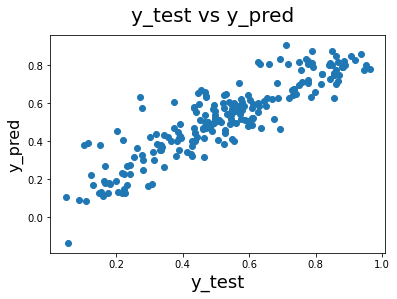

In [205]:
# Plot y_test and y_pred

fig = plt.figure()
plt.scatter(bike_sharing_y_test, bike_sharing_y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)


We can see that the equation of our best fitted line is:

$cnt = 0.5124 \times temp - 0.1538 \times windspeed + 0.1033 \times S2 + 0.1252 \times S4 + 0.2331 \times yr\_2019 + 0.0357 \times Oct + 0.0589 \times Aug + 0.1185 \times Sep - 0.0818 \times W2 - 0.2843 \times W3 + 0.1310  $

In [206]:
vif=pd.DataFrame()
vif['Feature']=bike_sharing_X_test.columns
vif['VIF']=[variance_inflation_factor(bike_sharing_X_test.values,i) for i in range(bike_sharing_X_test.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,const,17.67
4,S4,1.75
6,Oct,1.54
1,temp,1.40
3,S2,1.34
7,Aug,1.27
8,Sep,1.21
2,windspeed,1.14
10,W3,1.09
9,W2,1.06
